In [1]:
# General hypothesis- We would like to use this data set to see if the pokemon with 
# the highest stats are the hardest to capture.

In [18]:
import json
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Load in pkmn-go.csv and pokemon-spawns.csv files, create pandas dbs
pkmn_go="Resources/pkmn-go.csv "
pokemon_csv= pd.read_csv(pkmn_go)

bay_area_spawns="Resources/pokemon-spawns.csv "
bay_area_csv= pd.read_csv(bay_area_spawns)


In [14]:
pokemon_csv.head()


,name,stamina,atk,def,capture_rate,flee_rate,spawn_chance,primary,secondary,cp,url
0,Bulbasaur,90,126,126,0.16,0.10,69.0,Grass,Poison,1079,http://cdn.bulbagarden.net/upload/thumb/2/21/0...
1,Ivysaur,120,156,158,0.08,0.07,4.2,Grass,Poison,1643,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
2,Venusaur,160,198,200,0.04,0.05,1.7,Grass,Poison,2598,http://cdn.bulbagarden.net/upload/thumb/a/ae/0...
3,Charmander,78,128,108,0.16,0.10,25.3,Fire,NaN,962,http://cdn.bulbagarden.net/upload/thumb/7/73/0...
4,Charmeleon,116,160,140,0.08,0.07,1.2,Fire,NaN,1568,http://cdn.bulbagarden.net/upload/thumb/4/4a/0...


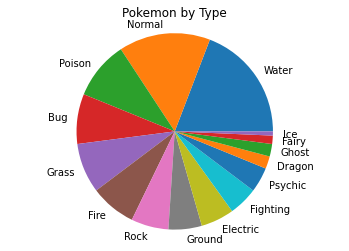

In [47]:
# pie chart of all types of pokemon
#take "primary" column, create lists to plot
types = pokemon_csv["primary"].value_counts(dropna=False).keys().tolist()
counts = pokemon_csv["primary"].value_counts(dropna=False).tolist()

# Data to plot
types_pie = []
counts_pie = []

for x, y in types_count_dict.items():
    types_pie.append(x)
    counts_pie.append(y)

# Plot
plt.pie(counts_pie, labels=types_pie, labeldistance=1.1)
plt.title("Pokemon by Type")
plt.axis('equal')
plt.show()